In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

In [2]:
pd.set_option('display.max_columns', None)

X_df = pd.read_csv('data/Training/combined_datasets/train.csv')
#X.drop(columns=['Unnamed: 0'], inplace=True)
print(X_df.shape)
X_df.head()

(1092525, 83)


,mkt_unique_carrier,mkt_carrier_fl_num,tail_num,op_carrier_fl_num,origin_airport_id,origin,dest_airport_id,dest,crs_dep_time,crs_arr_time,crs_elapsed_time,distance,year,month,day,day_of_week,week_of_year,crs_dep_hour,crs_arr_hour,month_avg_arr_delay,month_avg_air_time,month_avg_carrier_delay,month_avg_weather_delay,month_avg_nas_delay,month_avg_security_delay,month_avg_late_aircraft_delay,day_of_week_avg_arr_delay,day_of_week_avg_air_time,day_of_week_avg_carrier_delay,day_of_week_avg_weather_delay,day_of_week_avg_nas_delay,day_of_week_avg_security_delay,day_of_week_avg_late_aircraft_delay,arr_hour_avg_arr_delay,arr_hour_avg_air_time,arr_hour_avg_carrier_delay,arr_hour_avg_weather_delay,arr_hour_avg_nas_delay,arr_hour_avg_security_delay,arr_hour_avg_late_aircraft_delay,origin_total_flights,dest_total_flights,month_flight_avg_seats,month_flight_avg_passengers,carrier_month_seats,carrier_month_passengers,carrier_month_avg_seats,carrier_month_avg_passengers,month_avg_fuel_comsumption,orig_airport_month_flight_seats,orig_airport_month_passengers,dest_airport_month_flight_seats,dest_airport_month_passengers,origin_min_temp,origin_max_temp,origin_avg_temp,origin_total_snow_cm,origin_windspeed_kmph,origin_precipitation_mm,origin_humidity,origin_visibility,origin_cloud_cover,origin_heat_index_c,origin_wind_chill_c,origin_wind_gust_kmph,origin_feels_like,origin_weather_description,origin_pressure,dest_min_temp,dest_max_temp,dest_avg_temp,dest_total_snow_cm,dest_windspeed_kmph,dest_precipitation_mm,dest_humidity,dest_visibility,dest_cloud_cover,dest_heat_index_c,dest_wind_chill_c,dest_wind_gust_kmph,dest_feels_like,dest_weather_description,dest_pressure
0,WN,6253,N8553W,6253,14122,PIT,13204,MCO,1610,1825,135.0,834,2018,9,28,5,39,16,18,-4.856410,109.010256,32.157895,0.000000,0.631579,0.0,52.473684,5.028351,112.404639,14.441176,1.338235,12.985294,0.000000,39.750000,9.794393,113.028037,22.666667,0.000000,12.095238,0.000000,38.000000,16476,40367,156.688446,133.358861,78901284,62539560,153.984737,121.514593,157453740.2,4650071,3550404,17690901,14467289,11.0,21.0,17.0,0.0,6.0,0.0,76.0,10.0,22.0,16.0,16.0,9.0,16.0,Partly cloudy,1019.0,26.0,34.0,31.0,0.0,8.0,0.9,71.0,10.0,14.0,34.0,29.0,10.0,34.0,Sunny,1018.0
1,WN,6279,N444WN,6279,14321,PWM,10821,BWI,535,710,95.0,452,2018,9,28,5,39,5,7,-0.725322,71.884120,59.761905,3.714286,5.238095,0.0,18.428571,1.393855,74.631285,37.285714,2.020408,7.959184,0.000000,21.040816,-2.178354,74.153963,54.754717,0.000000,16.113208,0.320755,6.358491,5773,34338,155.089744,138.365690,78901284,62539560,153.984737,121.514593,157453740.2,1154895,962404,12809026,10253075,12.0,17.0,14.0,0.0,9.0,1.2,77.0,8.0,54.0,13.0,13.0,14.0,13.0,Light drizzle,1019.0,15.0,24.0,21.0,0.0,9.0,2.1,76.0,10.0,36.0,20.0,19.0,11.0,19.0,Partly cloudy,1018.0
2,WN,1798,N7839A,1798,14492,RDU,10693,BNA,620,650,90.0,442,2018,9,28,5,39,6,6,-4.048485,67.618182,2.230769,0.000000,12.923077,0.0,14.769231,1.981250,71.656250,9.960784,2.705882,4.196078,0.313725,30.764706,-5.719780,72.972527,23.000000,0.000000,13.666667,0.000000,0.000000,22739,26928,155.076923,115.956185,78901284,62539560,153.984737,121.514593,157453740.2,6023381,4603572,7613155,6149937,21.0,27.0,25.0,0.0,9.0,1.2,81.0,10.0,42.0,26.0,24.0,13.0,26.0,Light rain shower,1018.0,12.0,24.0,20.0,0.0,4.0,0.0,79.0,10.0,11.0,19.0,18.0,6.0,18.0,Sunny,1020.0
3,WN,1058,N457WN,1058,14492,RDU,11292,DEN,1940,2120,220.0,1436,2018,9,28,5,39,19,21,-2.648148,195.500000,6.857143,2.428571,12.928571,0.0,19.214286,2.058824,204.663102,6.975610,1.365854,14.121951,0.000000,21.634146,8.785978,203.837638,8.296296,2.246914,11.530864,0.000000,27.580247,22739,94040,159.000000,139.984087,78901284,62539560,153.984737,121.514593,157453740.2,6023381,4603572,29507455,25361777,21.0,27.0,25.0,0.0,9.0,1.2,81.0,10.0,42.0,26.0,24.0,13.0,26.0,Light rain shower,1018.0,6.0,12.0,9.0,0.0,16.0,0.2,68.0,10.0,24.0,9.0,6.0,22.0,6.0,Patchy rain possible,1020.0
4,WN,5745,N916WN,5745,14570,RNO,12889,LAS,2135,2245,70.0,345,2018,9,28,5,39,21,22,-2.4896

In [3]:
y_df = pd.read_csv('data/Training/combined_datasets/target.csv')
print(y_df.shape)
y_df.head()

(1092525, 1)


,arr_delay
0,-6.0
1,0.0
2,1.0
3,-8.0
4,7.0


In [4]:
full_df = pd.concat([X_df, y_df], axis=1)
full_df.head()

,mkt_unique_carrier,mkt_carrier_fl_num,tail_num,op_carrier_fl_num,origin_airport_id,origin,dest_airport_id,dest,crs_dep_time,crs_arr_time,crs_elapsed_time,distance,year,month,day,day_of_week,week_of_year,crs_dep_hour,crs_arr_hour,month_avg_arr_delay,month_avg_air_time,month_avg_carrier_delay,month_avg_weather_delay,month_avg_nas_delay,month_avg_security_delay,month_avg_late_aircraft_delay,day_of_week_avg_arr_delay,day_of_week_avg_air_time,day_of_week_avg_carrier_delay,day_of_week_avg_weather_delay,day_of_week_avg_nas_delay,day_of_week_avg_security_delay,day_of_week_avg_late_aircraft_delay,arr_hour_avg_arr_delay,arr_hour_avg_air_time,arr_hour_avg_carrier_delay,arr_hour_avg_weather_delay,arr_hour_avg_nas_delay,arr_hour_avg_security_delay,arr_hour_avg_late_aircraft_delay,origin_total_flights,dest_total_flights,month_flight_avg_seats,month_flight_avg_passengers,carrier_month_seats,carrier_month_passengers,carrier_month_avg_seats,carrier_month_avg_passengers,month_avg_fuel_comsumption,orig_airport_month_flight_seats,orig_airport_month_passengers,dest_airport_month_flight_seats,dest_airport_month_passengers,origin_min_temp,origin_max_temp,origin_avg_temp,origin_total_snow_cm,origin_windspeed_kmph,origin_precipitation_mm,origin_humidity,origin_visibility,origin_cloud_cover,origin_heat_index_c,origin_wind_chill_c,origin_wind_gust_kmph,origin_feels_like,origin_weather_description,origin_pressure,dest_min_temp,dest_max_temp,dest_avg_temp,dest_total_snow_cm,dest_windspeed_kmph,dest_precipitation_mm,dest_humidity,dest_visibility,dest_cloud_cover,dest_heat_index_c,dest_wind_chill_c,dest_wind_gust_kmph,dest_feels_like,dest_weather_description,dest_pressure,arr_delay
0,WN,6253,N8553W,6253,14122,PIT,13204,MCO,1610,1825,135.0,834,2018,9,28,5,39,16,18,-4.856410,109.010256,32.157895,0.000000,0.631579,0.0,52.473684,5.028351,112.404639,14.441176,1.338235,12.985294,0.000000,39.750000,9.794393,113.028037,22.666667,0.000000,12.095238,0.000000,38.000000,16476,40367,156.688446,133.358861,78901284,62539560,153.984737,121.514593,157453740.2,4650071,3550404,17690901,14467289,11.0,21.0,17.0,0.0,6.0,0.0,76.0,10.0,22.0,16.0,16.0,9.0,16.0,Partly cloudy,1019.0,26.0,34.0,31.0,0.0,8.0,0.9,71.0,10.0,14.0,34.0,29.0,10.0,34.0,Sunny,1018.0,-6.0
1,WN,6279,N444WN,6279,14321,PWM,10821,BWI,535,710,95.0,452,2018,9,28,5,39,5,7,-0.725322,71.884120,59.761905,3.714286,5.238095,0.0,18.428571,1.393855,74.631285,37.285714,2.020408,7.959184,0.000000,21.040816,-2.178354,74.153963,54.754717,0.000000,16.113208,0.320755,6.358491,5773,34338,155.089744,138.365690,78901284,62539560,153.984737,121.514593,157453740.2,1154895,962404,12809026,10253075,12.0,17.0,14.0,0.0,9.0,1.2,77.0,8.0,54.0,13.0,13.0,14.0,13.0,Light drizzle,1019.0,15.0,24.0,21.0,0.0,9.0,2.1,76.0,10.0,36.0,20.0,19.0,11.0,19.0,Partly cloudy,1018.0,0.0
2,WN,1798,N7839A,1798,14492,RDU,10693,BNA,620,650,90.0,442,2018,9,28,5,39,6,6,-4.048485,67.618182,2.230769,0.000000,12.923077,0.0,14.769231,1.981250,71.656250,9.960784,2.705882,4.196078,0.313725,30.764706,-5.719780,72.972527,23.000000,0.000000,13.666667,0.000000,0.000000,22739,26928,155.076923,115.956185,78901284,62539560,153.984737,121.514593,157453740.2,6023381,4603572,7613155,6149937,21.0,27.0,25.0,0.0,9.0,1.2,81.0,10.0,42.0,26.0,24.0,13.0,26.0,Light rain shower,1018.0,12.0,24.0,20.0,0.0,4.0,0.0,79.0,10.0,11.0,19.0,18.0,6.0,18.0,Sunny,1020.0,1.0
3,WN,1058,N457WN,1058,14492,RDU,11292,DEN,1940,2120,220.0,1436,2018,9,28,5,39,19,21,-2.648148,195.500000,6.857143,2.428571,12.928571,0.0,19.214286,2.058824,204.663102,6.975610,1.365854,14.121951,0.000000,21.634146,8.785978,203.837638,8.296296,2.246914,11.530864,0.000000,27.580247,22739,94040,159.000000,139.984087,78901284,62539560,153.984737,121.514593,157453740.2,6023381,4603572,29507455,25361777,21.0,27.0,25.0,0.0,9.0,1.2,81.0,10.0,42.0,26.0,24.0,13.0,26.0,Light rain shower,1018.0,6.0,12.0,9.0,0.0,16.0,0.2,68.0,10.0,24.0,9.0,6.0,22.0,6.0,Patchy rain possible,1020.0,-8.0
4,WN,5745,N916WN,5745,14570,RNO,12889,LAS,2135,2245,70.0,345,

In [5]:
total = full_df.isnull().sum().sort_values(ascending=False)
percent = (full_df.isnull().sum()/full_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(30)

,Total,Percent
dest_windspeed_kmph,107635,0.098519
dest_cloud_cover,107635,0.098519
dest_min_temp,107635,0.098519
dest_max_temp,107635,0.098519
dest_avg_temp,107635,0.098519
dest_total_snow_cm,107635,0.098519
dest_precipitation_mm,107635,0.098519
dest_humidity,107635,0.098519
dest_visibility,107635,0.098519
dest_heat_index_c,107635,0.098519


In [6]:
full_df.dropna(inplace=True)
full_df.reset_index(drop=True, inplace=True)
full_df.shape

(884526, 84)

In [7]:
X_df = full_df.iloc[:, :-1]
y_df = full_df.iloc[:, -1]
X_df.head()

,mkt_unique_carrier,mkt_carrier_fl_num,tail_num,op_carrier_fl_num,origin_airport_id,origin,dest_airport_id,dest,crs_dep_time,crs_arr_time,crs_elapsed_time,distance,year,month,day,day_of_week,week_of_year,crs_dep_hour,crs_arr_hour,month_avg_arr_delay,month_avg_air_time,month_avg_carrier_delay,month_avg_weather_delay,month_avg_nas_delay,month_avg_security_delay,month_avg_late_aircraft_delay,day_of_week_avg_arr_delay,day_of_week_avg_air_time,day_of_week_avg_carrier_delay,day_of_week_avg_weather_delay,day_of_week_avg_nas_delay,day_of_week_avg_security_delay,day_of_week_avg_late_aircraft_delay,arr_hour_avg_arr_delay,arr_hour_avg_air_time,arr_hour_avg_carrier_delay,arr_hour_avg_weather_delay,arr_hour_avg_nas_delay,arr_hour_avg_security_delay,arr_hour_avg_late_aircraft_delay,origin_total_flights,dest_total_flights,month_flight_avg_seats,month_flight_avg_passengers,carrier_month_seats,carrier_month_passengers,carrier_month_avg_seats,carrier_month_avg_passengers,month_avg_fuel_comsumption,orig_airport_month_flight_seats,orig_airport_month_passengers,dest_airport_month_flight_seats,dest_airport_month_passengers,origin_min_temp,origin_max_temp,origin_avg_temp,origin_total_snow_cm,origin_windspeed_kmph,origin_precipitation_mm,origin_humidity,origin_visibility,origin_cloud_cover,origin_heat_index_c,origin_wind_chill_c,origin_wind_gust_kmph,origin_feels_like,origin_weather_description,origin_pressure,dest_min_temp,dest_max_temp,dest_avg_temp,dest_total_snow_cm,dest_windspeed_kmph,dest_precipitation_mm,dest_humidity,dest_visibility,dest_cloud_cover,dest_heat_index_c,dest_wind_chill_c,dest_wind_gust_kmph,dest_feels_like,dest_weather_description,dest_pressure
0,WN,6253,N8553W,6253,14122,PIT,13204,MCO,1610,1825,135.0,834,2018,9,28,5,39,16,18,-4.856410,109.010256,32.157895,0.000000,0.631579,0.0,52.473684,5.028351,112.404639,14.441176,1.338235,12.985294,0.000000,39.750000,9.794393,113.028037,22.666667,0.000000,12.095238,0.000000,38.000000,16476,40367,156.688446,133.358861,78901284,62539560,153.984737,121.514593,157453740.2,4650071,3550404,17690901,14467289,11.0,21.0,17.0,0.0,6.0,0.0,76.0,10.0,22.0,16.0,16.0,9.0,16.0,Partly cloudy,1019.0,26.0,34.0,31.0,0.0,8.0,0.9,71.0,10.0,14.0,34.0,29.0,10.0,34.0,Sunny,1018.0
1,WN,6279,N444WN,6279,14321,PWM,10821,BWI,535,710,95.0,452,2018,9,28,5,39,5,7,-0.725322,71.884120,59.761905,3.714286,5.238095,0.0,18.428571,1.393855,74.631285,37.285714,2.020408,7.959184,0.000000,21.040816,-2.178354,74.153963,54.754717,0.000000,16.113208,0.320755,6.358491,5773,34338,155.089744,138.365690,78901284,62539560,153.984737,121.514593,157453740.2,1154895,962404,12809026,10253075,12.0,17.0,14.0,0.0,9.0,1.2,77.0,8.0,54.0,13.0,13.0,14.0,13.0,Light drizzle,1019.0,15.0,24.0,21.0,0.0,9.0,2.1,76.0,10.0,36.0,20.0,19.0,11.0,19.0,Partly cloudy,1018.0
2,WN,1798,N7839A,1798,14492,RDU,10693,BNA,620,650,90.0,442,2018,9,28,5,39,6,6,-4.048485,67.618182,2.230769,0.000000,12.923077,0.0,14.769231,1.981250,71.656250,9.960784,2.705882,4.196078,0.313725,30.764706,-5.719780,72.972527,23.000000,0.000000,13.666667,0.000000,0.000000,22739,26928,155.076923,115.956185,78901284,62539560,153.984737,121.514593,157453740.2,6023381,4603572,7613155,6149937,21.0,27.0,25.0,0.0,9.0,1.2,81.0,10.0,42.0,26.0,24.0,13.0,26.0,Light rain shower,1018.0,12.0,24.0,20.0,0.0,4.0,0.0,79.0,10.0,11.0,19.0,18.0,6.0,18.0,Sunny,1020.0
3,WN,1058,N457WN,1058,14492,RDU,11292,DEN,1940,2120,220.0,1436,2018,9,28,5,39,19,21,-2.648148,195.500000,6.857143,2.428571,12.928571,0.0,19.214286,2.058824,204.663102,6.975610,1.365854,14.121951,0.000000,21.634146,8.785978,203.837638,8.296296,2.246914,11.530864,0.000000,27.580247,22739,94040,159.000000,139.984087,78901284,62539560,153.984737,121.514593,157453740.2,6023381,4603572,29507455,25361777,21.0,27.0,25.0,0.0,9.0,1.2,81.0,10.0,42.0,26.0,24.0,13.0,26.0,Light rain shower,1018.0,6.0,12.0,9.0,0.0,16.0,0.2,68.0,10.0,24.0,9.0,6.0,22.0,6.0,Patchy rain possible,1020.0
4,WN,5745,N916WN,5745,14570,RNO,12889,LAS,2135,2245,70.0,345,2018,9,28,5,39,21,22,-2.4896

## Feature Droping

In [ ]:
# Try PCA to include tail_num

In [12]:
X_df['origin_airport_id'].nunique()

101

In [8]:
to_drop = ['mkt_carrier_fl_num', 'op_carrier_fl_num', 'origin_airport_id', 'origin', 'dest_airport_id',
          'dest', 'crs_dep_time', 'crs_arr_time', 'origin_weather_description', 'dest_weather_description']
X_df.drop(to_drop, axis=1, inplace=True)
print(X_df.shape)
X_df.head()

(884526, 72)


,mkt_unique_carrier,crs_elapsed_time,distance,year,month,day,day_of_week,week_of_year,crs_dep_hour,crs_arr_hour,month_avg_arr_delay,month_avg_air_time,month_avg_carrier_delay,month_avg_weather_delay,month_avg_nas_delay,month_avg_security_delay,month_avg_late_aircraft_delay,day_of_week_avg_arr_delay,day_of_week_avg_air_time,day_of_week_avg_carrier_delay,day_of_week_avg_weather_delay,day_of_week_avg_nas_delay,day_of_week_avg_security_delay,day_of_week_avg_late_aircraft_delay,arr_hour_avg_arr_delay,arr_hour_avg_air_time,arr_hour_avg_carrier_delay,arr_hour_avg_weather_delay,arr_hour_avg_nas_delay,arr_hour_avg_security_delay,arr_hour_avg_late_aircraft_delay,origin_total_flights,dest_total_flights,month_flight_avg_seats,month_flight_avg_passengers,carrier_month_seats,carrier_month_passengers,carrier_month_avg_seats,carrier_month_avg_passengers,month_avg_fuel_comsumption,orig_airport_month_flight_seats,orig_airport_month_passengers,dest_airport_month_flight_seats,dest_airport_month_passengers,origin_min_temp,origin_max_temp,origin_avg_temp,origin_total_snow_cm,origin_windspeed_kmph,origin_precipitation_mm,origin_humidity,origin_visibility,origin_cloud_cover,origin_heat_index_c,origin_wind_chill_c,origin_wind_gust_kmph,origin_feels_like,origin_pressure,dest_min_temp,dest_max_temp,dest_avg_temp,dest_total_snow_cm,dest_windspeed_kmph,dest_precipitation_mm,dest_humidity,dest_visibility,dest_cloud_cover,dest_heat_index_c,dest_wind_chill_c,dest_wind_gust_kmph,dest_feels_like,dest_pressure
0,WN,135.0,834,2018,9,28,5,39,16,18,-4.856410,109.010256,32.157895,0.000000,0.631579,0.0,52.473684,5.028351,112.404639,14.441176,1.338235,12.985294,0.000000,39.750000,9.794393,113.028037,22.666667,0.000000,12.095238,0.000000,38.000000,16476,40367,156.688446,133.358861,78901284,62539560,153.984737,121.514593,157453740.2,4650071,3550404,17690901,14467289,11.0,21.0,17.0,0.0,6.0,0.0,76.0,10.0,22.0,16.0,16.0,9.0,16.0,1019.0,26.0,34.0,31.0,0.0,8.0,0.9,71.0,10.0,14.0,34.0,29.0,10.0,34.0,1018.0
1,WN,95.0,452,2018,9,28,5,39,5,7,-0.725322,71.884120,59.761905,3.714286,5.238095,0.0,18.428571,1.393855,74.631285,37.285714,2.020408,7.959184,0.000000,21.040816,-2.178354,74.153963,54.754717,0.000000,16.113208,0.320755,6.358491,5773,34338,155.089744,138.365690,78901284,62539560,153.984737,121.514593,157453740.2,1154895,962404,12809026,10253075,12.0,17.0,14.0,0.0,9.0,1.2,77.0,8.0,54.0,13.0,13.0,14.0,13.0,1019.0,15.0,24.0,21.0,0.0,9.0,2.1,76.0,10.0,36.0,20.0,19.0,11.0,19.0,1018.0
2,WN,90.0,442,2018,9,28,5,39,6,6,-4.048485,67.618182,2.230769,0.000000,12.923077,0.0,14.769231,1.981250,71.656250,9.960784,2.705882,4.196078,0.313725,30.764706,-5.719780,72.972527,23.000000,0.000000,13.666667,0.000000,0.000000,22739,26928,155.076923,115.956185,78901284,62539560,153.984737,121.514593,157453740.2,6023381,4603572,7613155,6149937,21.0,27.0,25.0,0.0,9.0,1.2,81.0,10.0,42.0,26.0,24.0,13.0,26.0,1018.0,12.0,24.0,20.0,0.0,4.0,0.0,79.0,10.0,11.0,19.0,18.0,6.0,18.0,1020.0
3,WN,220.0,1436,2018,9,28,5,39,19,21,-2.648148,195.500000,6.857143,2.428571,12.928571,0.0,19.214286,2.058824,204.663102,6.975610,1.365854,14.121951,0.000000,21.634146,8.785978,203.837638,8.296296,2.246914,11.530864,0.000000,27.580247,22739,94040,159.000000,139.984087,78901284,62539560,153.984737,121.514593,157453740.2,6023381,4603572,29507455,25361777,21.0,27.0,25.0,0.0,9.0,1.2,81.0,10.0,42.0,26.0,24.0,13.0,26.0,1018.0,6.0,12.0,9.0,0.0,16.0,0.2,68.0,10.0,24.0,9.0,6.0,22.0,6.0,1020.0
4,WN,70.0,345,2018,9,28,5,39,21,22,-2.489642,54.472693,12.267857,0.678571,9.767857,0.0,17.642857,4.561924,53.954964,12.050279,1.318436,7.776536,0.128492,27.944134,11.378446,54.583960,5.500000,0.000000,5.277778,0.000000,41.259259,7759,55700,155.233728,123.361095,78901284,62539560,153.984737,121.514593,157453740.2,2131372,1687478,23377952,19451761,11.0,28.0,22.0,0.0,6.0,0.0,22.0,10.0,12.0,18.0,18.0,10.0,18.0,1010.0,24.0,35.0,30.0,0.0,6.0,0.0,14.0,10.0,14.0,27.0,29.0,10.0,27.0,1010.0


## Feature Engineering

In [9]:
# #correlation matrix
# corrmat = full_df.corr()
# f, ax = plt.subplots(figsize=(12, 9))
# sns.heatmap(corrmat, vmax=.8, square=True,cmap="RdYlGn_r")

## Feature Scaling and encoding

In [10]:
from src.modules.feature_engineering import scale_encoder

In [11]:
scaled_df, scaler = scale_encoder(X_df)
print(scaled_df.shape)
scaled_df.head()

(884526, 81)


,crs_elapsed_time,distance,year,month,day,day_of_week,week_of_year,crs_dep_hour,crs_arr_hour,month_avg_arr_delay,month_avg_air_time,month_avg_carrier_delay,month_avg_weather_delay,month_avg_nas_delay,month_avg_security_delay,month_avg_late_aircraft_delay,day_of_week_avg_arr_delay,day_of_week_avg_air_time,day_of_week_avg_carrier_delay,day_of_week_avg_weather_delay,day_of_week_avg_nas_delay,day_of_week_avg_security_delay,day_of_week_avg_late_aircraft_delay,arr_hour_avg_arr_delay,arr_hour_avg_air_time,arr_hour_avg_carrier_delay,arr_hour_avg_weather_delay,arr_hour_avg_nas_delay,arr_hour_avg_security_delay,arr_hour_avg_late_aircraft_delay,origin_total_flights,dest_total_flights,month_flight_avg_seats,month_flight_avg_passengers,carrier_month_seats,carrier_month_passengers,carrier_month_avg_seats,carrier_month_avg_passengers,month_avg_fuel_comsumption,orig_airport_month_flight_seats,orig_airport_month_passengers,dest_airport_month_flight_seats,dest_airport_month_passengers,origin_min_temp,origin_max_temp,origin_avg_temp,origin_total_snow_cm,origin_windspeed_kmph,origin_precipitation_mm,origin_humidity,origin_visibility,origin_cloud_cover,origin_heat_index_c,origin_wind_chill_c,origin_wind_gust_kmph,origin_feels_like,origin_pressure,dest_min_temp,dest_max_temp,dest_avg_temp,dest_total_snow_cm,dest_windspeed_kmph,dest_precipitation_mm,dest_humidity,dest_visibility,dest_cloud_cover,dest_heat_index_c,dest_wind_chill_c,dest_wind_gust_kmph,dest_feels_like,dest_pressure,mkt_unique_carrier_AS,mkt_unique_carrier_B6,mkt_unique_carrier_DL,mkt_unique_carrier_F9,mkt_unique_carrier_G4,mkt_unique_carrier_HA,mkt_unique_carrier_NK,mkt_unique_carrier_UA,mkt_unique_carrier_VX,mkt_unique_carrier_WN
0,-0.170919,-0.022489,-1.008504,0.711621,1.396699,1.048003,0.829034,0.609862,0.655883,-1.153297,-0.112640,0.776564,-0.495866,-1.149057,-0.117683,1.825368,-0.032139,-0.065465,-0.445376,-0.397742,-0.228261,-0.158794,1.166940,0.449473,-0.056752,0.045844,-0.559274,-0.281392,-0.131863,0.902923,-0.915249,-0.267463,0.097410,0.378730,0.728268,0.561809,-0.4722,-0.602395,0.279101,-0.986994,-0.992934,-0.022190,-0.042761,-0.187988,0.042097,-0.053824,-0.116309,-1.070833,-0.474272,0.655428,0.554016,-0.405361,-0.113483,0.043597,-0.957438,-0.014287,0.322777,1.320251,1.262704,1.301372,-0.116633,-0.699429,-0.370668,0.366390,0.551768,-0.696627,1.557242,1.183064,-0.830926,1.471736,0.161798,0,0,0,0,0,0,0,0,0,1
1,-0.708611,-0.648885,-1.008504,0.711621,1.396699,1.048003,0.829034,-1.637040,-1.449161,-0.683027,-0.629374,2.556292,0.101416,-0.786183,-0.117683,-0.491052,-0.541020,-0.592042,1.372613,-0.253135,-0.668627,-0.158794,-0.402533,-0.739836,-0.598449,1.838886,-0.559274,0.048378,0.236043,-1.047500,-1.204502,-0.430479,0.022999,0.569077,0.728268,0.561809,-0.4722,-0.602395,0.279101,-1.245086,-1.217770,-0.382776,-0.408994,-0.087386,-0.333678,-0.344385,-0.116309,-0.515198,-0.336717,0.713460,-1.216267,0.763435,-0.392110,-0.219531,-0.330495,-0.262129,0.322777,0.214775,0.324048,0.333648,-0.116633,-0.514495,-0.231829,0.656930,0.551768,0.107545,0.258182,0.306893,-0.705653,0.233769,0.161798,0,0,0,0,0,0,0,0,0,1
2,-0.775822,-0.665283,-1.008504,0.711621,1.396699,1.048003,0.829034,-1.432776,-1.640528,-1.061325,-0.688749,-1.152944,-0.495866,-0.180805,-0.117683,-0.740032,-0.458777,-0.633515,-0.801930,-0.107828,-0.998333,0.372351,0.413183,-1.091623,-0.614912,0.064470,-0.559274,-0.152419,-0.131863,-1.439446,-0.745988,-0.630836,0.022403,-0.282876,0.728268,0.561809,-0.4722,-0.602395,0.279101,-0.885586,-0.901439,-0.766555,-0.765574,0.818026,0.605758,0.721005,-0.116309,-0.515198,-0.336717,0.945589,0.554016,0.325136,0.815274,0.745272,-0.455884,0.811853,0.160878,-0.086718,0.324048,0.236876,-0.116633,-1.439162,-0.474796,0.831254,0.551768,-0.806287,0.165392,0.219276,-1.332019,0.151238,0.485684,0,0,0,0,0,0,0,0,0,1
3,0.971675,0.964659,-1.008504,0.711621,1.396699,1.048003,0.829034,1.222653,1.229986,-0.901915,1.091154,-0.854665,-0.105336,-0.180372,-0.117683,-0.437592,-0.447915,1.220659,-1.039493,-0.391888,-0.1

In [12]:
y_df.shape

(884526,)

## Modelling

In [13]:
from src.modules.models import randforest_reg, ensemble_feature_importance, regmodel_evaluation

In [14]:
X = scaled_df.values
y = y_df.values.ravel()

In [15]:
print(X.shape, y.shape)

(884526, 81) (884526,)


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
rf_model = randforest_reg(X_train,y_train)

In [18]:
print(rf_model)

{'RandomForest_Reg': RandomForestRegressor(n_jobs=-1)}


In [19]:
regmodel_evaluation(rf_model, X_test, y_test)

RandomForest_Reg metrics:
	R2 = 0.06975250295012514
	Adjusted R2 = 0.06932637274573528
	RMSE = 48.32210802223488

*******************************************************************



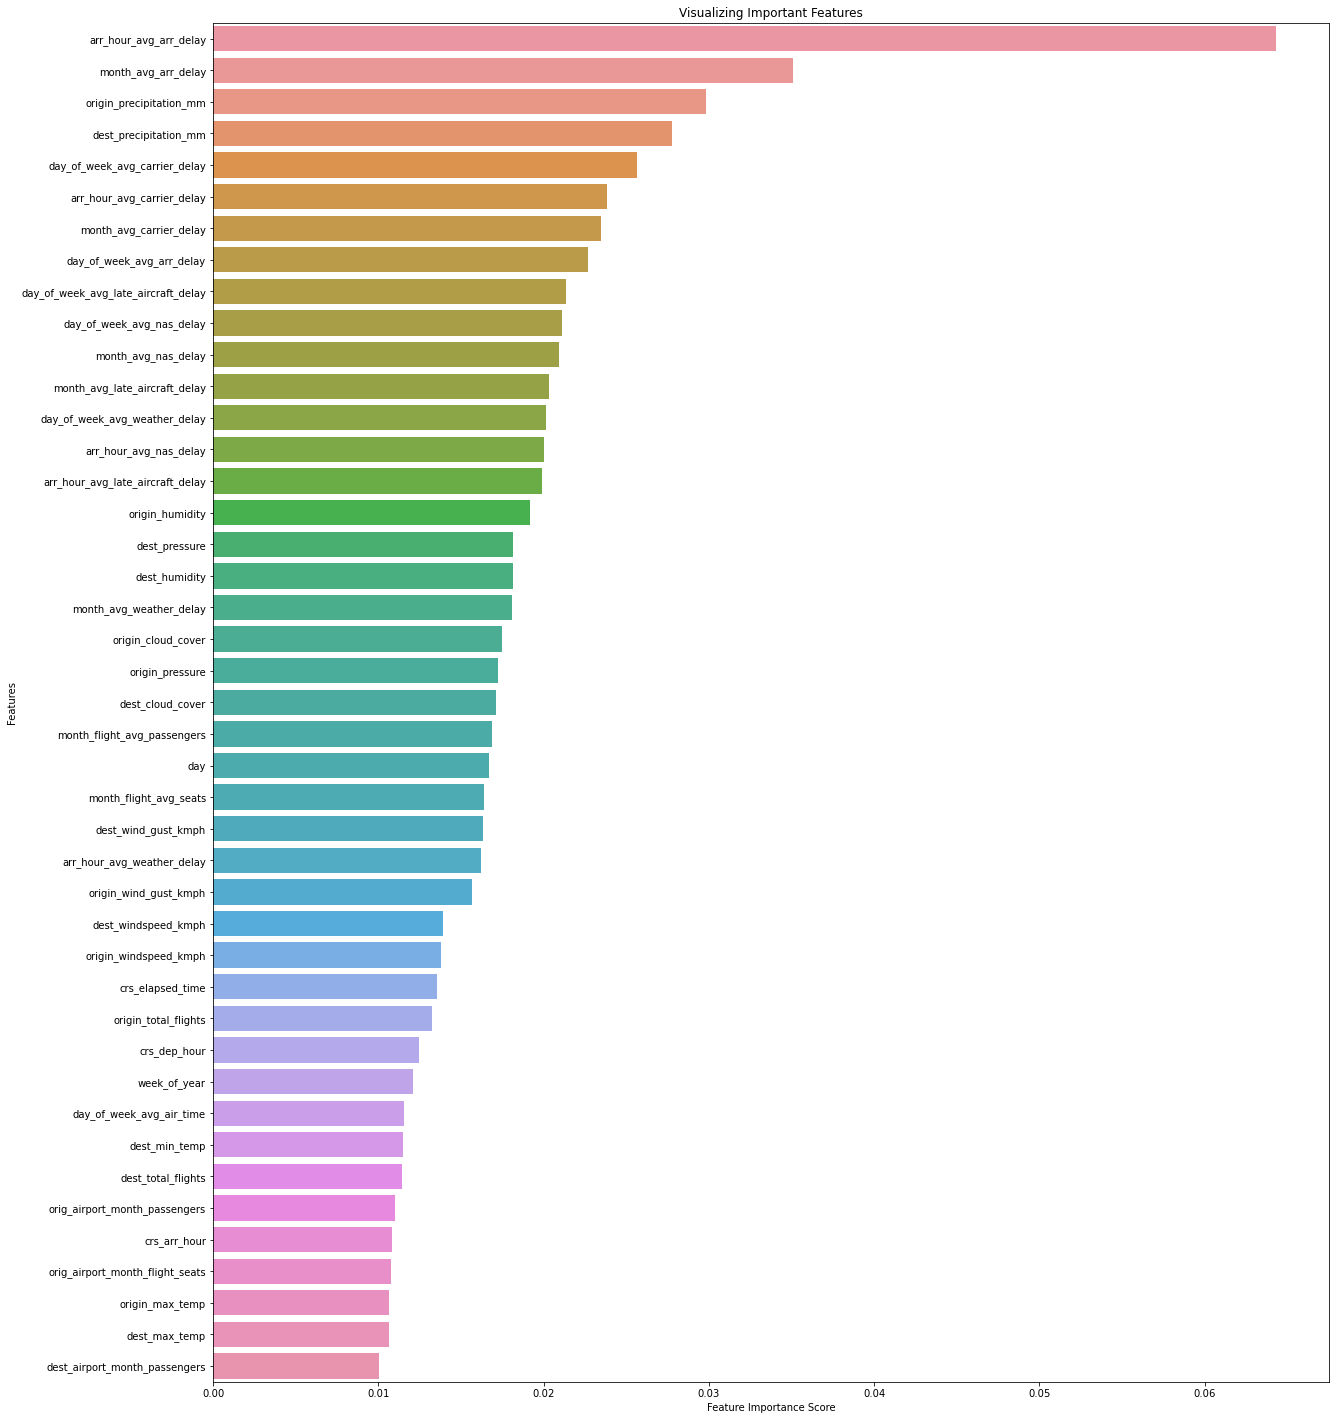

In [20]:
ensemble_feature_importance(trained_model['RandomForest_Reg'], scaled_df)

## XGBoost

In [21]:
from src.modules.models import xgboost_reg

In [26]:
xgb_model = xgboost_reg(X_train,y_train)

In [27]:
regmodel_evaluation(xgb_model, X_test, y_test)

XGBoost_Reg metrics:
	R2 = 0.10792865909583693
	Adjusted R2 = 0.10752001672481692
	RMSE = 47.320182444441166

*******************************************************************



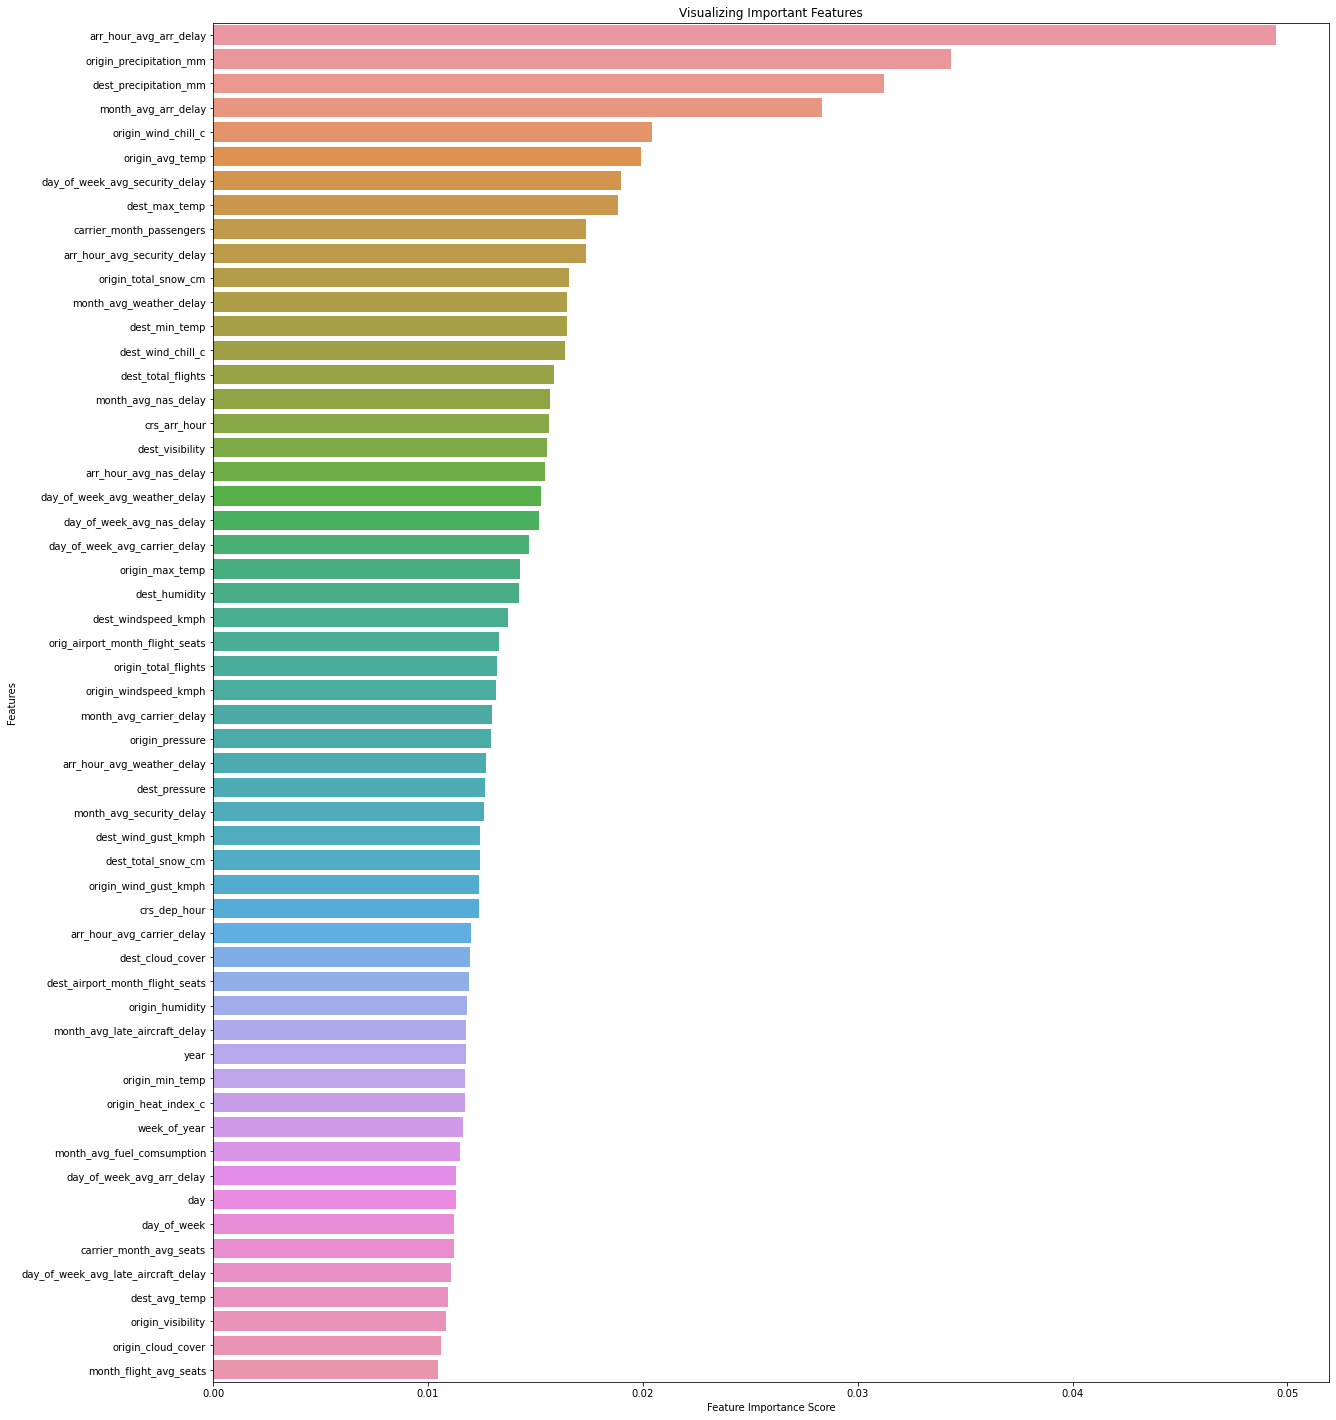

In [32]:
ensemble_feature_importance(xgb_model['XGBoost_Reg'], scaled_df)

## Pickling

In [25]:
regmodel_evaluation(rf_model, X_test, y_test)

RandomForest_Reg metrics:
	R2 = 0.07137203789679558
	Adjusted R2 = 0.07094664957320618
	RMSE = 48.28002597718614

*******************************************************************



In [28]:
import pickle

In [29]:
# save the model to disk
filename = 'output/xgb_model_01.pickle'
pickle.dump(xgb_model, open(filename, 'wb'))

In [30]:
# save the model to disk
filename = 'output/rf_model_007.pickle'
pickle.dump(xgb_model, open(filename, 'wb'))

In [ ]:
# load the model from disk
#loaded_model = pickle.load(open(filename, 'rb'))

# Smaller sample

In [21]:
from src.modules.models import svr_reg

In [16]:
# Need to use smaller sample size for svm O(n^2) complextiy:

svm_df = pd.concat([scaled_df, y_df], axis=1)
svm_df.head()

,crs_elapsed_time,distance,year,month,day,day_of_week,week_of_year,crs_dep_hour,crs_arr_hour,month_avg_arr_delay,month_avg_air_time,month_avg_carrier_delay,month_avg_weather_delay,month_avg_nas_delay,month_avg_security_delay,month_avg_late_aircraft_delay,day_of_week_avg_arr_delay,day_of_week_avg_air_time,day_of_week_avg_carrier_delay,day_of_week_avg_weather_delay,day_of_week_avg_nas_delay,day_of_week_avg_security_delay,day_of_week_avg_late_aircraft_delay,arr_hour_avg_arr_delay,arr_hour_avg_air_time,arr_hour_avg_carrier_delay,arr_hour_avg_weather_delay,arr_hour_avg_nas_delay,arr_hour_avg_security_delay,arr_hour_avg_late_aircraft_delay,origin_total_flights,dest_total_flights,month_flight_avg_seats,month_flight_avg_passengers,carrier_month_seats,carrier_month_passengers,carrier_month_avg_seats,carrier_month_avg_passengers,month_avg_fuel_comsumption,orig_airport_month_flight_seats,orig_airport_month_passengers,dest_airport_month_flight_seats,dest_airport_month_passengers,origin_min_temp,origin_max_temp,origin_avg_temp,origin_total_snow_cm,origin_windspeed_kmph,origin_precipitation_mm,origin_humidity,origin_visibility,origin_cloud_cover,origin_heat_index_c,origin_wind_chill_c,origin_wind_gust_kmph,origin_feels_like,origin_pressure,dest_min_temp,dest_max_temp,dest_avg_temp,dest_total_snow_cm,dest_windspeed_kmph,dest_precipitation_mm,dest_humidity,dest_visibility,dest_cloud_cover,dest_heat_index_c,dest_wind_chill_c,dest_wind_gust_kmph,dest_feels_like,dest_pressure,mkt_unique_carrier_AS,mkt_unique_carrier_B6,mkt_unique_carrier_DL,mkt_unique_carrier_F9,mkt_unique_carrier_G4,mkt_unique_carrier_HA,mkt_unique_carrier_NK,mkt_unique_carrier_UA,mkt_unique_carrier_VX,mkt_unique_carrier_WN,arr_delay
0,-0.170919,-0.022489,-1.008504,0.711621,1.396699,1.048003,0.829034,0.609862,0.655883,-1.153297,-0.112640,0.776564,-0.495866,-1.149057,-0.117683,1.825368,-0.032139,-0.065465,-0.445376,-0.397742,-0.228261,-0.158794,1.166940,0.449473,-0.056752,0.045844,-0.559274,-0.281392,-0.131863,0.902923,-0.915249,-0.267463,0.097410,0.378730,0.728268,0.561809,-0.4722,-0.602395,0.279101,-0.986994,-0.992934,-0.022190,-0.042761,-0.187988,0.042097,-0.053824,-0.116309,-1.070833,-0.474272,0.655428,0.554016,-0.405361,-0.113483,0.043597,-0.957438,-0.014287,0.322777,1.320251,1.262704,1.301372,-0.116633,-0.699429,-0.370668,0.366390,0.551768,-0.696627,1.557242,1.183064,-0.830926,1.471736,0.161798,0,0,0,0,0,0,0,0,0,1,-6.0
1,-0.708611,-0.648885,-1.008504,0.711621,1.396699,1.048003,0.829034,-1.637040,-1.449161,-0.683027,-0.629374,2.556292,0.101416,-0.786183,-0.117683,-0.491052,-0.541020,-0.592042,1.372613,-0.253135,-0.668627,-0.158794,-0.402533,-0.739836,-0.598449,1.838886,-0.559274,0.048378,0.236043,-1.047500,-1.204502,-0.430479,0.022999,0.569077,0.728268,0.561809,-0.4722,-0.602395,0.279101,-1.245086,-1.217770,-0.382776,-0.408994,-0.087386,-0.333678,-0.344385,-0.116309,-0.515198,-0.336717,0.713460,-1.216267,0.763435,-0.392110,-0.219531,-0.330495,-0.262129,0.322777,0.214775,0.324048,0.333648,-0.116633,-0.514495,-0.231829,0.656930,0.551768,0.107545,0.258182,0.306893,-0.705653,0.233769,0.161798,0,0,0,0,0,0,0,0,0,1,0.0
2,-0.775822,-0.665283,-1.008504,0.711621,1.396699,1.048003,0.829034,-1.432776,-1.640528,-1.061325,-0.688749,-1.152944,-0.495866,-0.180805,-0.117683,-0.740032,-0.458777,-0.633515,-0.801930,-0.107828,-0.998333,0.372351,0.413183,-1.091623,-0.614912,0.064470,-0.559274,-0.152419,-0.131863,-1.439446,-0.745988,-0.630836,0.022403,-0.282876,0.728268,0.561809,-0.4722,-0.602395,0.279101,-0.885586,-0.901439,-0.766555,-0.765574,0.818026,0.605758,0.721005,-0.116309,-0.515198,-0.336717,0.945589,0.554016,0.325136,0.815274,0.745272,-0.455884,0.811853,0.160878,-0.086718,0.324048,0.236876,-0.116633,-1.439162,-0.474796,0.831254,0.551768,-0.806287,0.165392,0.219276,-1.332019,0.151238,0.485684,0,0,0,0,0,0,0,0,0,1,1.0
3,0.971675,0.964659,-1.008504,0.711621,1.396699,1.048003,0.829034,1.222653,1.229986,-0.901915,1.091154,-0.854665,-0.105336,-0.180372,-0.117683,-0.437592,-0.447915,1.220659,-

In [17]:
svm_df = svm_df.sample(frac=0.1, random_state=42)
svm_df.shape

(88453, 82)

In [18]:
X = svm_df.iloc[:, :-1].values
y = svm_df.iloc[:, -1].values.ravel()
print(X.shape, y.shape)

(88453, 81) (88453,)


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
svr = svr_reg(X_train,y_train)

In [23]:
print(svr)

{'LinSVR_Reg': LinearSVR(C=1, epsilon=0.1), 'SVR_Reg': SVR(C=1, coef0=0)}


In [24]:
regmodel_evaluation(svr, X_test, y_test)

LinSVR_Reg metrics:
	R2 = 0.008599589858513834
	Adjusted R2 = 0.004039226792952988
	RMSE = 47.89307434246819

*******************************************************************

SVR_Reg metrics:
	R2 = 0.014560673280811454
	Adjusted R2 = 0.01002773072505847
	RMSE = 47.748871728411395

*******************************************************************



In [25]:
trained_model = randforest_reg(X_train,y_train)

In [26]:
regmodel_evaluation(trained_model, X_test, y_test)

RandomForest_Reg metrics:
	R2 = 0.016197257418141486
	Adjusted R2 = 0.011671843019303796
	RMSE = 47.70920540088854

*******************************************************************

